<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

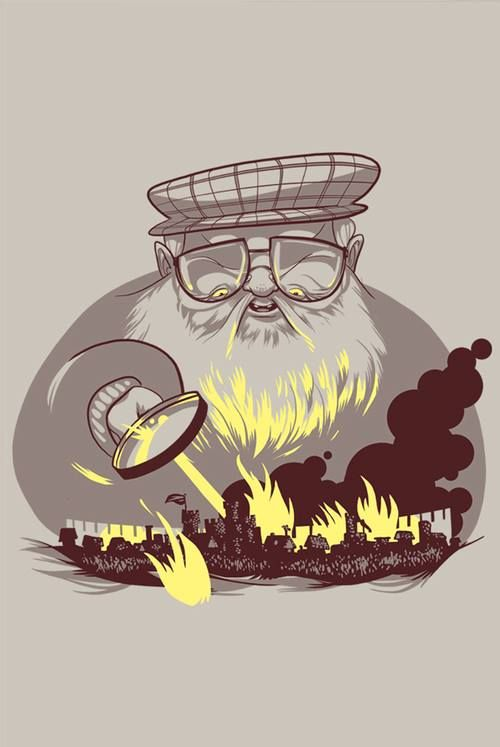

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 74.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 11.0MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')

In [ ]:
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
# заменяем None на ND
data['title'].fillna('ND', inplace=True)
data['culture'].fillna('ND', inplace=True)
data['house'].fillna('ND', inplace=True)

<ipython-input-379-6fd5feb350e8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['title'].fillna('ND', inplace=True)
<ipython-input-379-6fd5feb350e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
# for test: заменяем None на ND
data_test['title'].fillna('ND', inplace=True)
data_test['culture'].fillna('ND', inplace=True)
data_test['house'].fillna('ND', inplace=True)

<ipython-input-380-45adc68cb259>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['title'].fillna('ND', inplace=True)
<ipython-input-380-45adc68cb259>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# заменяем None в возрасте и дате рождения на медианные значения
median_date = np.median(data['dateOfBirth'].dropna().values)
median_age = np.median(data['age'].dropna().values)
data['dateOfBirth'].fillna(median_date, inplace=True)
data['age'].fillna(median_age, inplace=True)

<ipython-input-381-e22a6e8804fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dateOfBirth'].fillna(median_date, inplace=True)
<ipython-input-381-e22a6e8804fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# for test: заменяем None в возрасте и дате рождения на медианные значения
median_date = np.median(data_test['dateOfBirth'].dropna().values)
median_age = np.median(data_test['age'].dropna().values)
data_test['dateOfBirth'].fillna(median_date, inplace=True)
data_test['age'].fillna(median_age, inplace=True)

<ipython-input-382-fbfd0cc8fc4d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['dateOfBirth'].fillna(median_date, inplace=True)
<ipython-input-382-fbfd0cc8fc4d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data.loc[(data['popularity'] >= 0.5), ['isPopular']] = 1
data.loc[(data['popularity'] < 0.5), ['isPopular']] = 0

In [ ]:
# for test
data_test.loc[(data_test['popularity'] >= 0.5), ['isPopular']] = 1
data_test.loc[(data_test['popularity'] < 0.5), ['isPopular']] = 0

In [ ]:
data.loc[(data['numDeadRelations'] > 0), ['boolDeadRelations']] = 1
data.loc[(data['numDeadRelations'] == 0), ['boolDeadRelations']] = 0

In [ ]:
# for test
data_test.loc[(data_test['numDeadRelations'] > 0), ['boolDeadRelations']] = 1
data_test.loc[(data_test['numDeadRelations'] == 0), ['boolDeadRelations']] = 0

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for key in cult:
  data['culture'] = data['culture'].replace(cult[key], key)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        1557 non-null   float64
 5   mother             18 non-null     object 
 6   father             22 non-null     object 
 7   heir               21 non-null     object 
 8   house              1557 non-null   object 
 9   spouse             200 non-null    object 
 10  book1              1557 non-null   int64  
 11  book2              1557 non-null   int64  
 12  book3              1557 non-null   int64  
 13  book4              1557 non-null   int64  
 14  book5              1557 non-null   int64  
 15  isAliveMother      18 non-null     float64
 16  isAliveFather      22 non-nul

In [ ]:
# for test
for key in cult:
  data_test['culture'] = data_test['culture'].replace(cult[key], key)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
# удаляем лишние столбцы
data.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', \
                   'isAliveMother', 'isAliveFather', 'isAliveHeir', \
                   'isAliveSpouse'], inplace = True)

In [ ]:
# удаляем лишние столбцы
data.drop(columns=['isMarried'], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   dateOfBirth        1557 non-null   float64
 4   house              1557 non-null   object 
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  age                1557 non-null   float64
 12  numDeadRelations   1557 non-null   int64  
 13  popularity         1557 non-null   float64
 14  isAlive            1557 non-null   int64  
 15  isPopular          1557 non-null   float64
 16  boolDeadRelations  1557 non-n

In [ ]:
# for test: удаляем лишние столбцы
data_test.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

<BarContainer object of 2 artists>

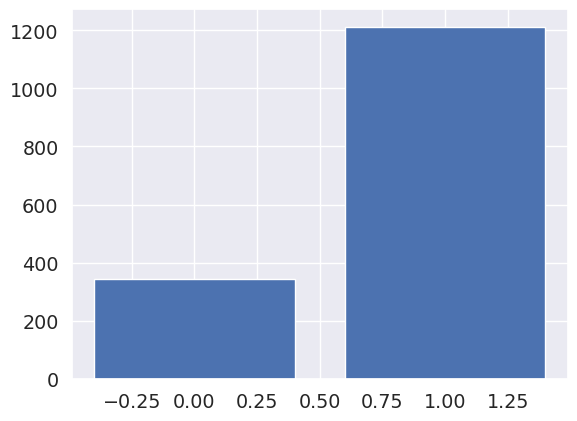

In [ ]:
dt = data['isAlive'].value_counts()
plt.bar(dt.index, dt.values)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   dateOfBirth        1557 non-null   float64
 4   house              1557 non-null   object 
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  age                1557 non-null   float64
 12  numDeadRelations   1557 non-null   int64  
 13  popularity         1557 non-null   float64
 14  isAlive            1557 non-null   int64  
 15  isPopular          1557 non-null   float64
 16  boolDeadRelations  1557 non-n

In [ ]:
# обрабатываем категориальные признаки с помощью label encoding
from sklearn.preprocessing import LabelEncoder

unprocessed_cat_features = ['title', 'culture', 'house']

label_encoding = LabelEncoder()

for column in unprocessed_cat_features:
  data[column] = label_encoding.fit_transform(data[column])

In [ ]:
# for test: обрабатываем категориальные признаки с помощью label encoding
for column in unprocessed_cat_features:
  data_test[column] = label_encoding.fit_transform(data_test[column])

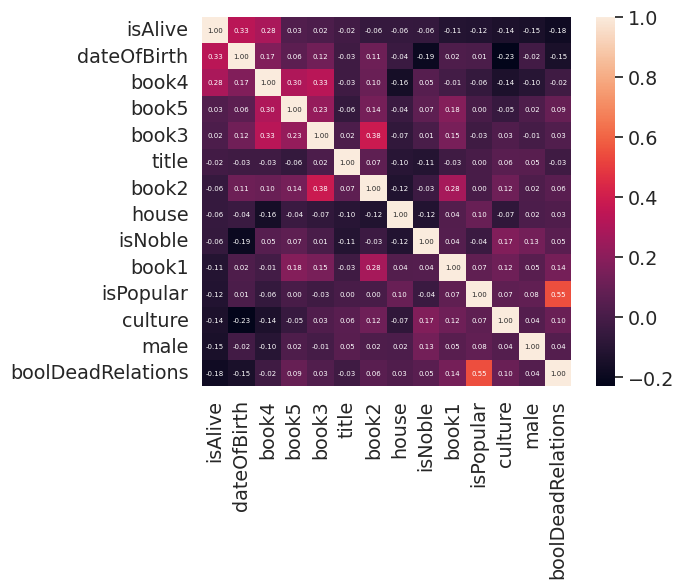

In [ ]:
# исследуем корреляцию между признаками
corrmat = data.corr()
k = 20
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# удаляем признаки которые скореллированы между собой
data.drop(columns=['popularity', 'numDeadRelations', 'age'], inplace=True)

In [ ]:
# for test: удаляем признаки которые скореллированы между собой
data_test.drop(columns=['popularity', 'numDeadRelations', 'age'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   int64  
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   int64  
 3   dateOfBirth        1557 non-null   float64
 4   house              1557 non-null   int64  
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  isAlive            1557 non-null   int64  
 12  isPopular          1557 non-null   float64
 13  boolDeadRelations  1557 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 182.5 KB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    int64  
 1   male               389 non-null    int64  
 2   culture            389 non-null    int64  
 3   dateOfBirth        389 non-null    float64
 4   house              389 non-null    int64  
 5   book1              389 non-null    int64  
 6   book2              389 non-null    int64  
 7   book3              389 non-null    int64  
 8   book4              389 non-null    int64  
 9   book5              389 non-null    int64  
 10  isNoble            389 non-null    int64  
 11  isPopular          389 non-null    float64
 12  boolDeadRelations  389 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 42.5 KB


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

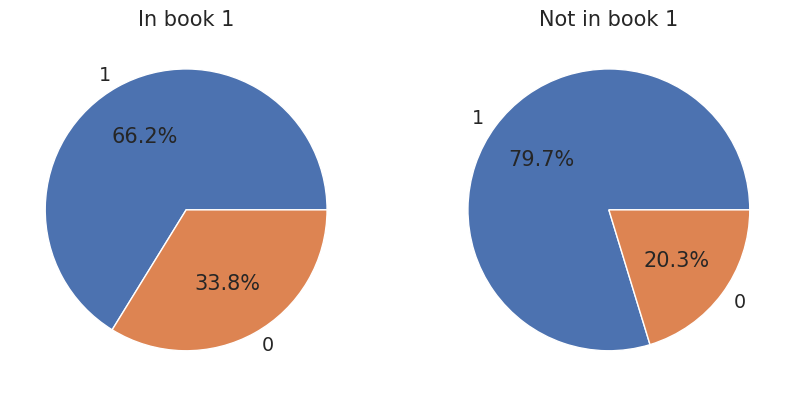

In [ ]:
data_book1_1 = data[data['book1'] == 1]['isAlive'].value_counts()
data_book1_0 = data[data['book1'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(data_book1_1.values, labels=data_book1_1.index, autopct='%1.1f%%')
ax2.pie(data_book1_0.values, labels=data_book1_0.index, autopct='%1.1f%%')

ax1.set_title("In book 1")
ax2.set_title("Not in book 1")

plt.show()

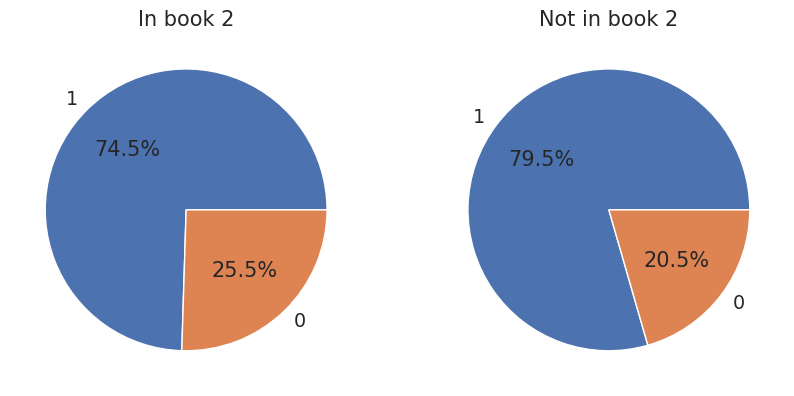

In [ ]:
data_book2_1 = data[data['book2'] == 1]['isAlive'].value_counts()
data_book2_0 = data[data['book2'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(data_book2_1.values, labels=data_book2_1.index, autopct='%1.1f%%')
ax2.pie(data_book2_0.values, labels=data_book2_0.index, autopct='%1.1f%%')

ax1.set_title("In book 2")
ax2.set_title("Not in book 2")

plt.show()

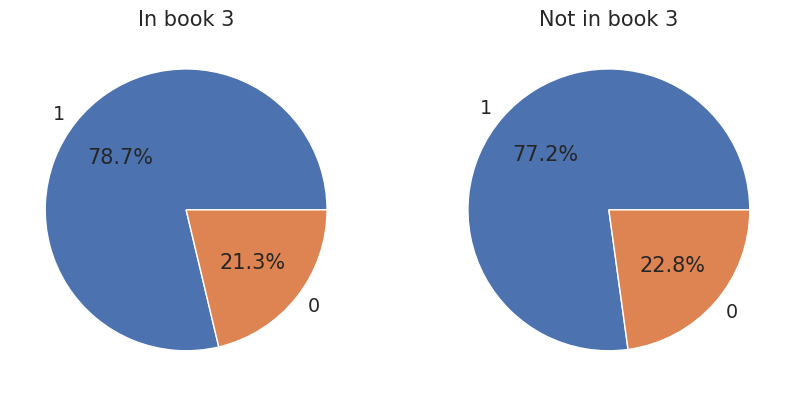

In [ ]:
data_book3_1 = data[data['book3'] == 1]['isAlive'].value_counts()
data_book3_0 = data[data['book3'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(data_book3_1.values, labels=data_book3_1.index, autopct='%1.1f%%')
ax2.pie(data_book3_0.values, labels=data_book3_0.index, autopct='%1.1f%%')

ax1.set_title("In book 3")
ax2.set_title("Not in book 3")

plt.show()

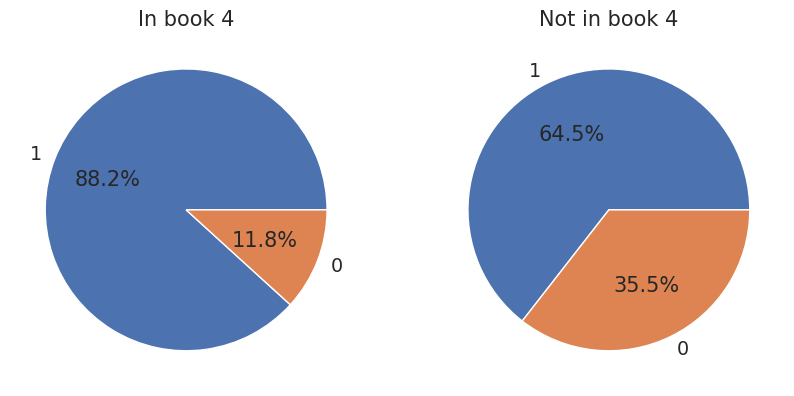

In [ ]:
data_book4_1 = data[data['book4'] == 1]['isAlive'].value_counts()
data_book4_0 = data[data['book4'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(data_book4_1.values, labels=data_book4_1.index, autopct='%1.1f%%')
ax2.pie(data_book4_0.values, labels=data_book4_0.index, autopct='%1.1f%%')

ax1.set_title("In book 4")
ax2.set_title("Not in book 4")

plt.show()

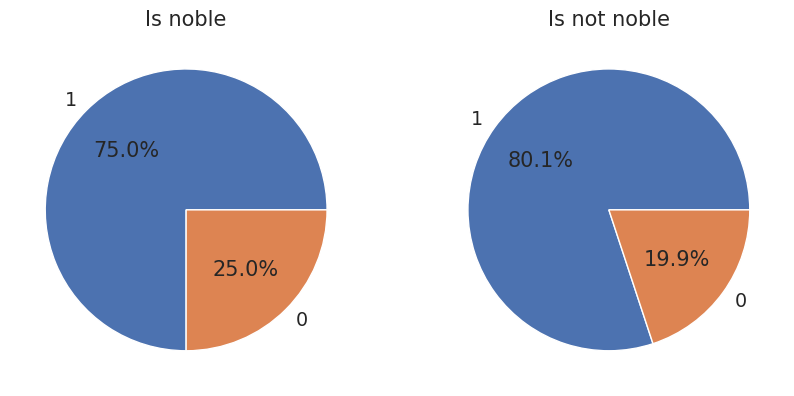

In [ ]:
data_nb_1 = data[data['isNoble'] == 1]['isAlive'].value_counts()
data_nb_0 = data[data['isNoble'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(data_nb_1.values, labels=data_nb_1.index, autopct='%1.1f%%')
ax2.pie(data_nb_0.values, labels=data_nb_0.index, autopct='%1.1f%%')

ax1.set_title("Is noble")
ax2.set_title("Is not noble")

plt.show()

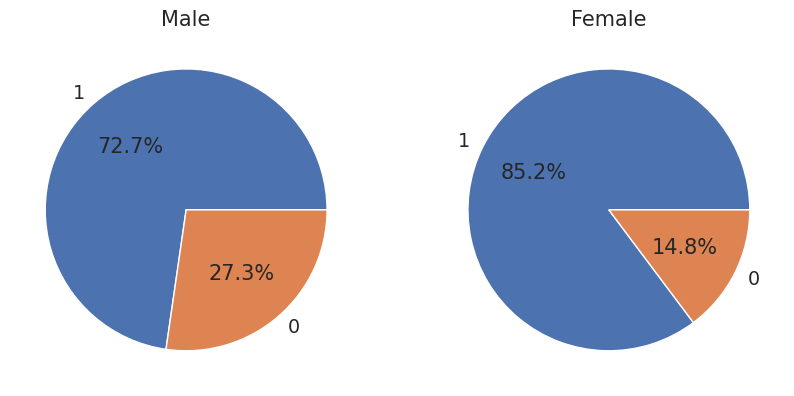

In [ ]:
data_male_1 = data[data['male'] == 1]['isAlive'].value_counts()
data_male_0 = data[data['male'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(data_male_1.values, labels=data_male_1.index, autopct='%1.1f%%')
ax2.pie(data_male_0.values, labels=data_male_0.index, autopct='%1.1f%%')

ax1.set_title("Male")
ax2.set_title("Female")

plt.show()

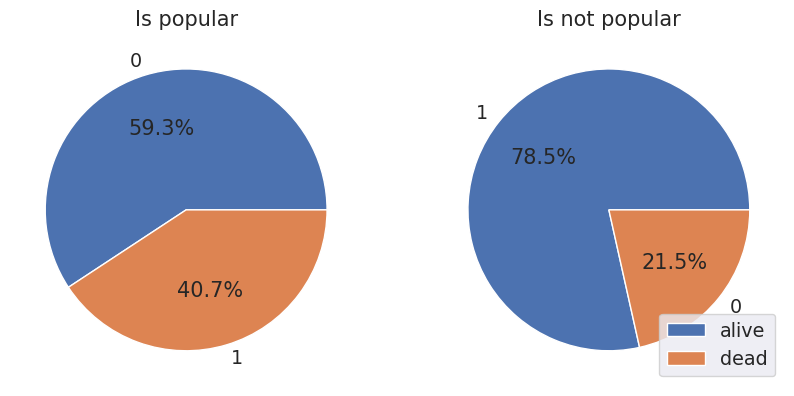

In [ ]:
data_pop_1 = data[data['isPopular'] == 1]['isAlive'].value_counts()
data_pop_0 = data[data['isPopular'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(data_pop_1.values, labels=data_pop_1.index, autopct='%1.1f%%')
ax2.pie(data_pop_0.values, labels=data_pop_0.index, autopct='%1.1f%%')

ax1.set_title("Is popular")
ax2.set_title("Is not popular")

plt.legend(['alive', 'dead'])

plt.show()

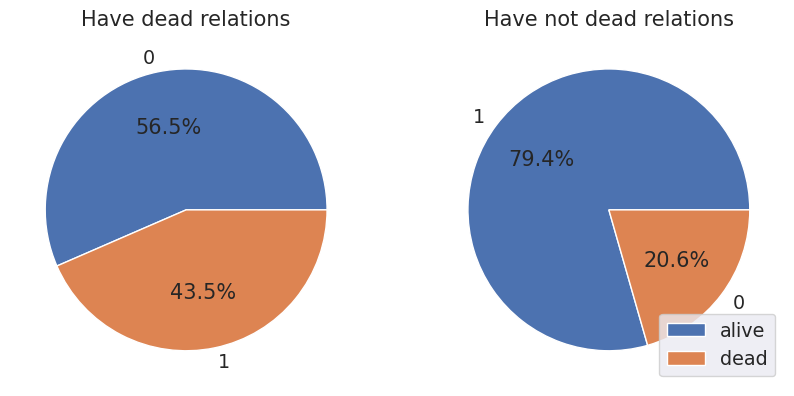

In [ ]:
data_dead_1 = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts()
data_dead_0 = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(data_dead_1.values, labels=data_dead_1.index, autopct='%1.1f%%')
ax2.pie(data_dead_0.values, labels=data_dead_0.index, autopct='%1.1f%%')

ax1.set_title("Have dead relations")
ax2.set_title("Have not dead relations")

plt.legend(['alive', 'dead'])

plt.show()

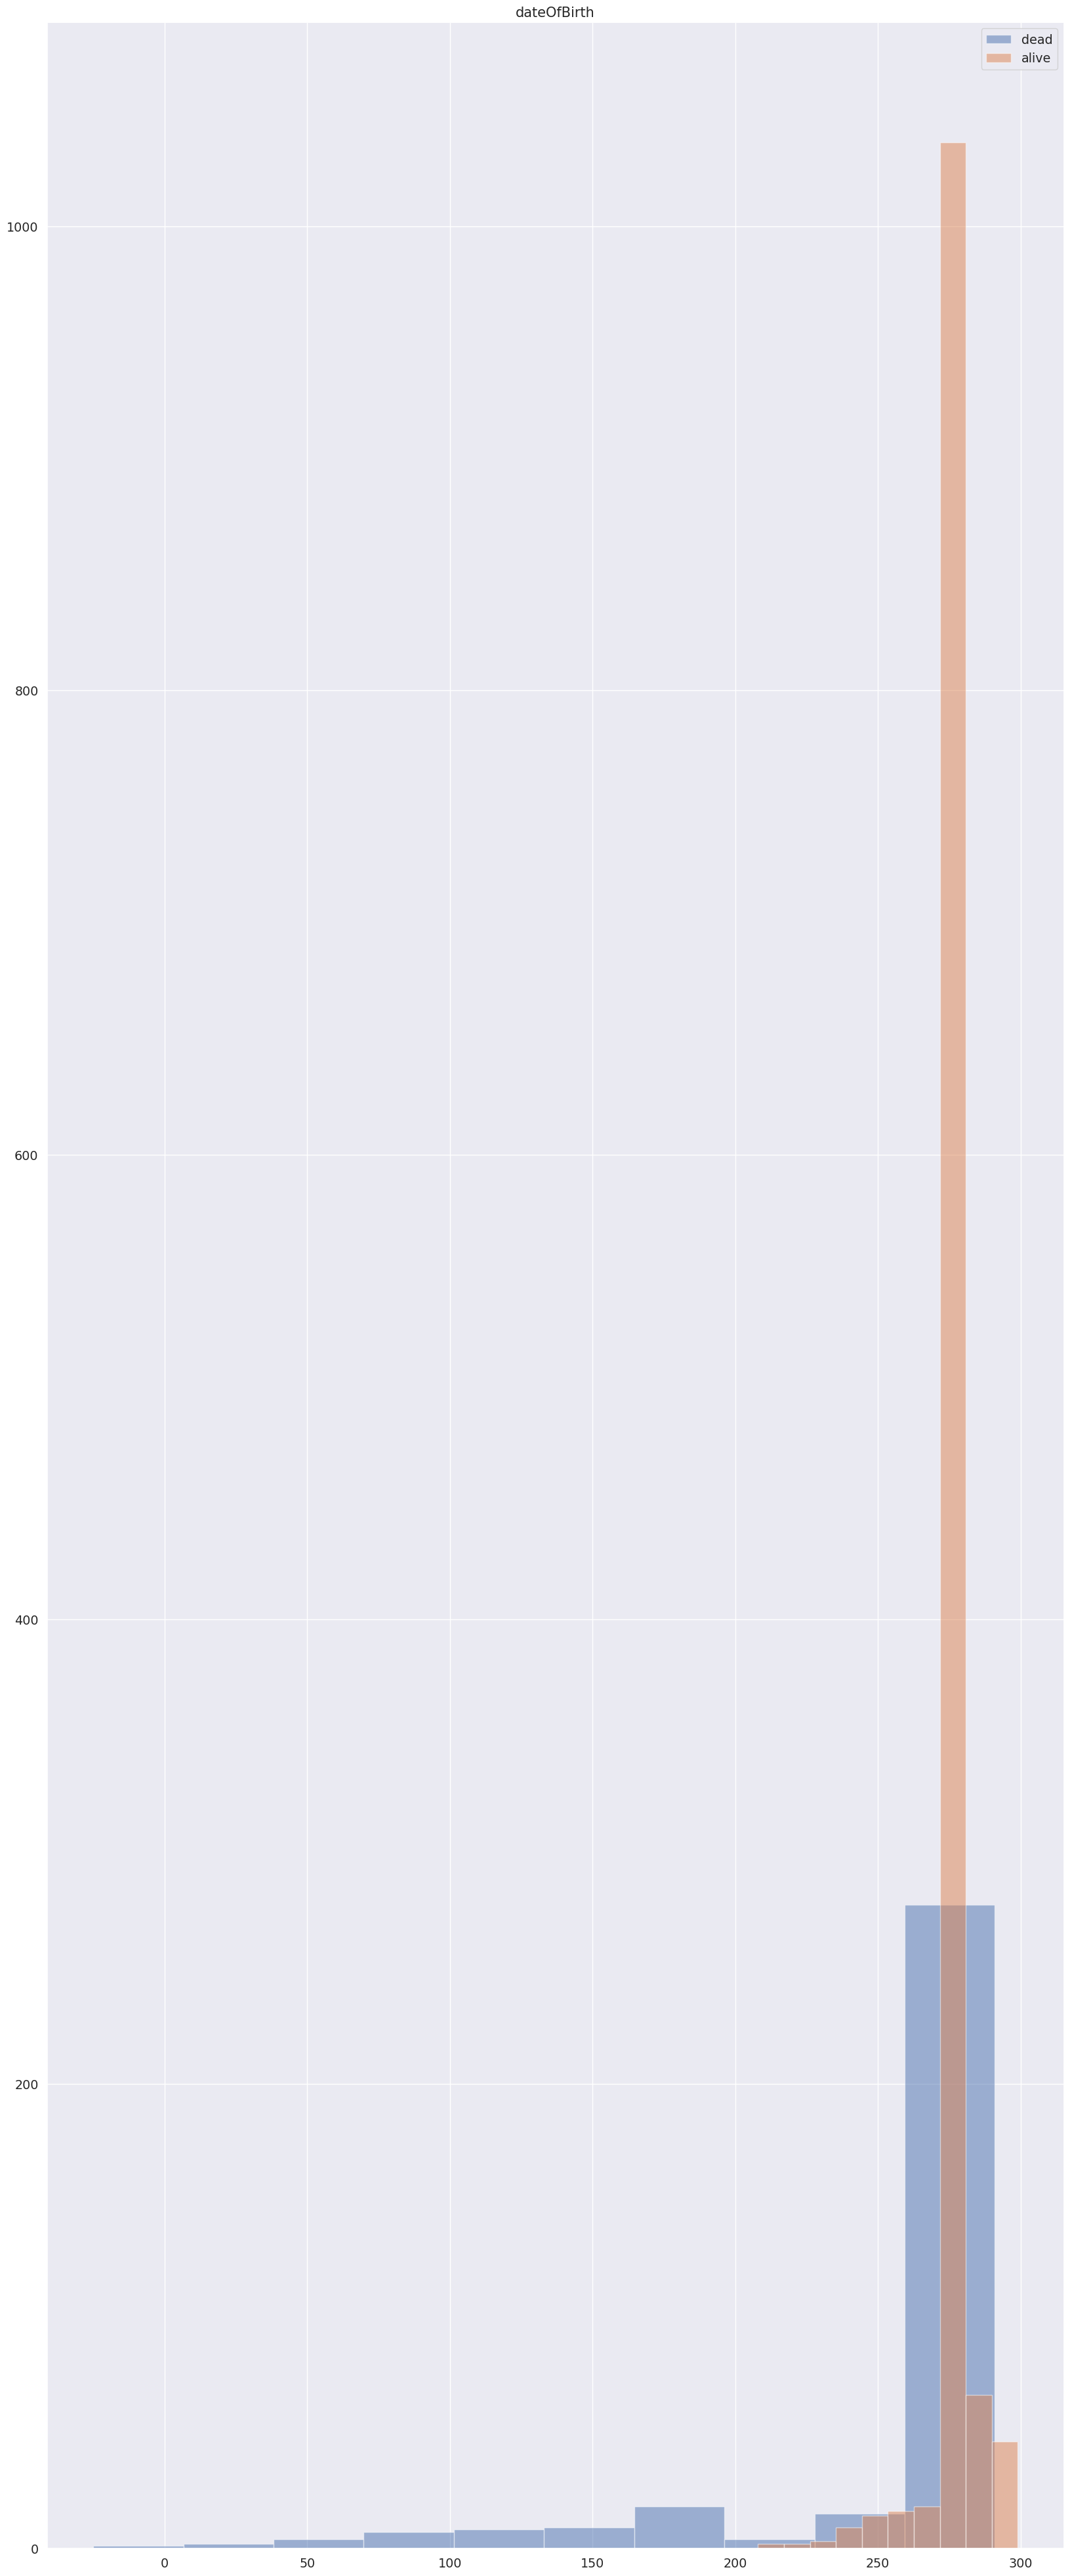

In [ ]:
plt.figure(figsize=(20, 50))

plt.hist(data['dateOfBirth'][data['isAlive'] == 0], alpha=0.5, label='dead')
plt.hist(data['dateOfBirth'][data['isAlive'] == 1], alpha=0.5, label='alive')

plt.legend()

plt.title('dateOfBirth')

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop(columns='isAlive').values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# маштабируем данные
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#for test: маштабируем данные
scaler.fit(data_test)
data_test = scaler.transform(data_test)

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost.predict(X_test)

In [ ]:
rnd_forest = RandomForestClassifier()

rnd_forest.fit(X_train, y_train)

y_pred = rnd_forest.predict(X_test)

In [ ]:
gaus_proc = GaussianProcessClassifier()

gaus_proc.fit(X_train, y_train)

y_pred = gaus_proc.predict(X_test)

In [ ]:
gaus_nb = GaussianNB()

gaus_nb.fit(X_train, y_train)

y_pred = gaus_nb.predict(X_test)

In [ ]:
# подбираем лучшие параметры для knn
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': np.arange(2, 22),
    'weights' : ['uniform', 'distance'],
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy : {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy : {accuracy_score(y_test, best_model.predict(X_test))}')

{'n_neighbors': 7, 'weights': 'uniform'}
Accuracy : 0.8401606425702811
Accuracy : 0.7948717948717948


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [ ]:
dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
y_pred = ada_boost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8237


In [ ]:
y_pred = rnd_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


In [ ]:
y_pred = gaus_proc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8269


In [ ]:
y_pred = gaus_nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


In [ ]:
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


In [ ]:
y_pred = dec_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7853


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.7MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission['isAlive'] = gaus_proc.predict(data_test)
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)